# Project for Servier - Van Eccelpoel Théo

The objective of this session is to code a few regression algorithms and to apply them to synthetic and real dataset.

We begin with the standard imports:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = \beta x + b
$$
where $\beta$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

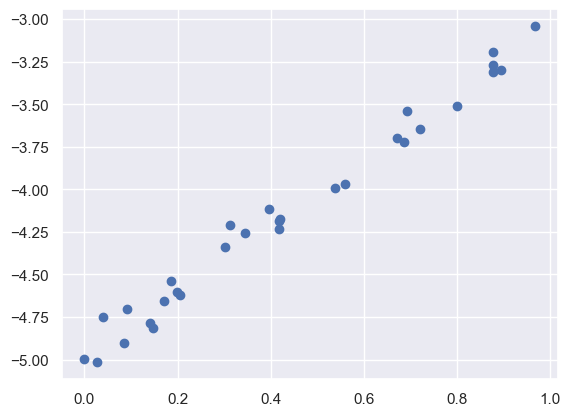

In [3]:
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* rng.randn(30)
plt.scatter(x, y)

Fill in the MultivariateLinearRegression class whose method fit takes a matrix $X$ and an array $y$ as input and returns an array of coefficients

In [4]:
class MultivariateLinearRegression():
    # Class for linear regression solving least-squares:

    def __init__(self,):
        self.coef_ = None


    def fit(self, X, y):
        """ Fit the data (X, y).

        Parameters:
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        """

        # Create the first column of ones for the intercept
        ones = np.ones((X.shape[0],), dtype=int)

        # Create the augmented X whose first column is filled with ones
        X_aug = np.column_stack((ones, X))

        # Update self.coef_ using the LS formula
        self.coef_ = np.linalg.inv(X_aug.T @ X_aug) @ (X_aug.T @ y)
        # --> Nécessite que la matrice soit inversable ! (pas de colinéarité)

        return self


    def predict(self, X):
        """ Make predictions for data X.

        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix

        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """

        # We need to recreate the augmented X to have the intercept
        ones = np.ones((X.shape[0],), dtype=int)
        X_aug = np.column_stack((ones, X))

        # For each row of X, we multiply its values by the corresponding coefficient to return a predicted value
        return X_aug @ self.coef_

    def print_s(self):
        """ Print the estimated model in a smoother way : ax1 + bx2 + ... + c
        Parameters:
        self
        Returns:
        res : string
        """

        res = 'The model is :'
        for ind, i in enumerate(self.coef_):
            if i >= 0 :
                res += f' + {round(i,2)}*x{ind}'

            else :
                res += f' - {abs(round(i,2))}*x{ind}'

        return res



Try your model on the data and plot the data points and the fitted line:

The model is : - 4.98*x0 + 1.93*x1


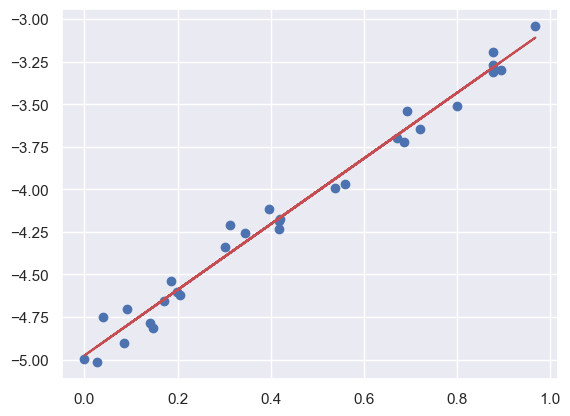

In [5]:
lin_regr = MultivariateLinearRegression()
lin_regr.fit(x, y)
y_pred = lin_regr.predict(x)
print(lin_regr.print_s()) # Quite close to the 2 and -5 from initialisation

plt.scatter(x, y)

# Plot predicted points
plt.plot(x, y_pred, 'r')

Print the scope and the intercept:

In [6]:
print("Model slope:    ", lin_regr.coef_[1])
print("Model intercept:", lin_regr.coef_[0])

Model slope:     1.92920553412906
Model intercept: -4.976046835178197


We see that the results are very close to the inputs, as we might hope.

Of course our linear regression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building a toy example:

In [7]:
rng = np.random.RandomState(1)
X = 3 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

lin_regr2 = MultivariateLinearRegression()
lin_regr2.fit(X, y)
y_pred = lin_regr2.predict(X)
print(lin_regr2.print_s())


The model is : + 0.5*x0 + 1.5*x1 - 2.0*x2 + 1.0*x3


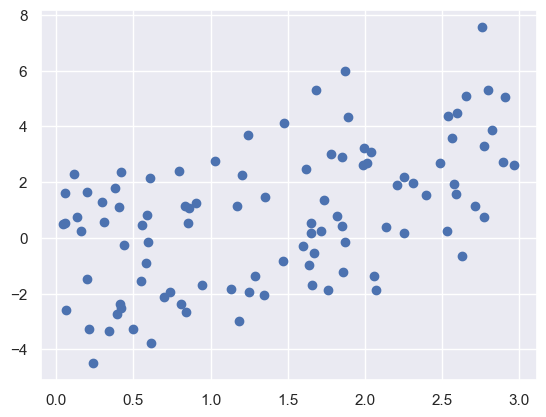

In [8]:
plt.scatter(X[:, 0], y)

Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

# Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.


### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [9]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(5, include_bias=False) # without intercept
poly.fit_transform(x[:, None])

array([[   2.,    4.,    8.,   16.,   32.],
       [   3.,    9.,   27.,   81.,  243.],
       [   4.,   16.,   64.,  256., 1024.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression

With this transform, we can use the linear model to fit much more complicated relationships between $x$ and $y$.
For example, here is a sine wave with noise:

For degree 1:
The model is : + 2.04*x0 - 4.03*x1 

For degree 2:
The model is : + 1.04*x0 + 2.65*x1 - 6.83*x2 

For degree 3:
The model is : - 0.44*x0 + 22.25*x1 - 58.28*x2 + 35.28*x3 

For degree 4:
The model is : - 0.18*x0 + 16.5*x1 - 31.04*x2 - 7.98*x3 + 21.84*x4 

For degree 5:
The model is : - 0.04*x0 + 11.39*x1 + 7.85*x2 - 117.59*x3 + 149.86*x4 - 52.58*x5 



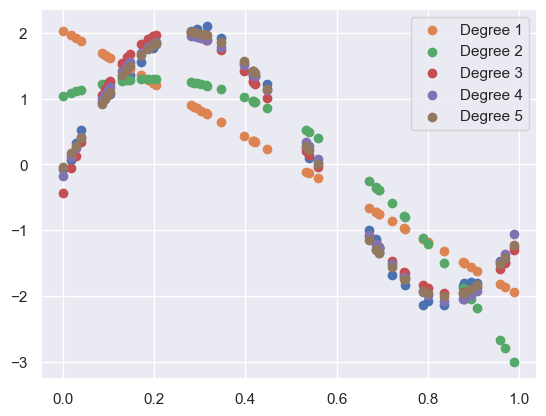

In [10]:
rng = np.random.RandomState(1)
x = rng.rand(50)
y = 2 * np.sin(1.8*np.pi*x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

# Try with different degrees
for i in range(1, 6):
    poly = PolynomialFeatures(i, include_bias=False)
    x_poly = poly.fit_transform(x[:, None])

    # Regression on the polynomial x
    poly_regr = MultivariateLinearRegression()
    poly_regr.fit(x_poly, y)
    y_pred = poly_regr.predict(x_poly)

    print(f"For degree {i}:")
    print(poly_regr.print_s(), '\n')
    plt.scatter(x, y_pred, label=f'Degree {i}')

plt.legend()
plt.show()


Try with different maximum degrees. Our linear model can provide an excellent fit to this non-linear data!

**How can we avoid overfitting?**

The higher the dimension, the higher the overfitting, because the model is so sophisticated that it even captures the noise ! It may lead to poor predictions on unseen data.

To avoid overfitting, we might first try to do a cross-validation : split our X and y in training and test sets.  
Then, a solution would be to explicitly choose a lower degree model, which balances better bias and variance.

Finally, we can also try to add a regularization term (Lasso Regression / Ridge Regression) to prevent coefficients to grow too much and to overfit the data.

# Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting.

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be
$$
P = \alpha\sum_{i=1}^n \beta_i^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.

 Fill in the following class:

In [11]:
class RidgeRegularization():
    # Class for ridge regression with closed form equation

    def __init__(self, alpha):
        self.coef_ = None
        # We add the penalty control term
        self.alpha_ = alpha

    def fit(self, X, y):
        """ Fit the data (X, y).

        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector

        Note:
        -----
        Updates self.coef_
        """
        # Create the first column of ones for the intercept
        ones = np.ones((X.shape[0],), dtype=int)

        # Create the augmented X whose first column is filled with ones
        X_aug = np.column_stack((ones, X))

        # Prepare Regularization term
        n_features = X_aug.shape[1]
        I = np.eye(n_features)
        I[0, 0] = 0  # Do not regularize the intercept term

        # Update self.coef_ using Ridge Regression formula
        self.coef_ = np.linalg.inv(X_aug.T @ X_aug + self.alpha_ * I) @ (X_aug.T @ y)

        return self


    def predict(self, X):
        """ Make predictions for data X.

        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix

        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """

        # We need to recreate the augmented X to have the intercept
        ones = np.ones((X.shape[0],), dtype=int)
        X_aug = np.column_stack((ones, X))

        # For each row of X, we multiply its values by the corresponding coefficient to return a predicted value
        return X_aug @ self.coef_

    def print_s(self):
        """ Print the estimated model in a better way : ax1 + bx2 + ... + c
        Parameters:
        self
        Returns:
        res : string
        """

        res = 'The model is :'
        for ind, i in enumerate(self.coef_):
            if i >= 0 :
                res += f' + {round(i,2)}*x{ind}'

            else :
                res += f' - {abs(round(i,2))}*x{ind}'

        return res

Try the model in our data. Plot the coefficients of the regression.

The model is : + 2.03*x0 - 4.0*x1
The model is : + 1.17*x0 + 1.82*x1 - 5.99*x2
The model is : + 1.12*x0 + 3.17*x1 - 10.53*x2 + 3.55*x3
The model is : + 0.94*x0 + 5.08*x1 - 11.71*x2 - 4.33*x3 + 7.92*x4
The model is : + 0.8*x0 + 5.87*x1 - 10.47*x2 - 6.92*x3 + 0.94*x4 + 8.22*x5


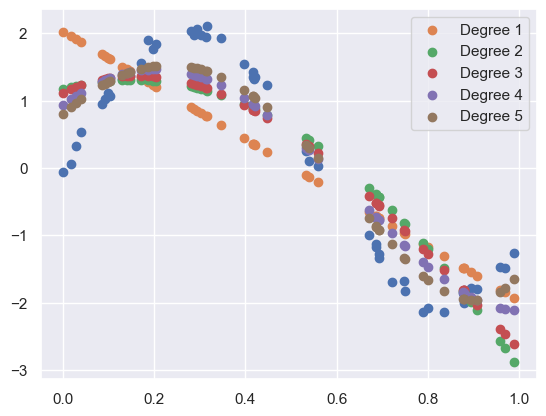

In [12]:
rng = np.random.RandomState(1)
x = rng.rand(50)
y = 2 * np.sin(1.8*np.pi*x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

# Change alpha to penalize more or less
alpha = 0.03

for i in range(1, 6):
    poly = PolynomialFeatures(i, include_bias=False) # with or without intercept
    x_poly = poly.fit_transform(x[:, None])

    poly_regr = RidgeRegularization(alpha)
    poly_regr.fit(x_poly, y)
    y_pred = poly_regr.predict(x_poly)

    #print(f"For degree {i}, coeffs are:", poly_regr.coef_)
    print(poly_regr.print_s())
    plt.scatter(x, y_pred, label=f'Degree {i}')

plt.legend()
plt.show()

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.

**Bonus:** How can we choose the $\alpha$ parameter?

To choose the best alpha, there may be 3 options:
- Option 1 : Cross validation
- Option 2 : Computing the model's AIC and BIC for different values of alpha
For medium to large datasets, BIC might be better as it penalizes more the model complexity than AIC
- Option 3 : Sklearn RidgeCV

### Lasso regression ($L_1$ Regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{i=1}^n |\beta_i|
$$

Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients.

First, fill in the following class:

In [13]:
class LassoRegularization():
    # Class for lasso regression with soft thresholding

    def __init__(self, alpha, learning_rate=0.01, iterations=1000):
        self.coef_ = None
        self.alpha = alpha
        self.learning_rate_ = learning_rate
        self.iterations_ = iterations

    def soft_threshold(self, value, alpha):
        """ Soft threshold function for Lasso.

        Parameters:
        -----------
        value: float
            The value to be thresholded
        alpha: float
            Regularization parameter

        Returns:
        --------
        float: Soft-thresholded value
        """
        if value < -alpha:
            return value + alpha
        elif value > alpha:
            return value - alpha
        else:
            return 0.0

    def fit(self, X, y):
        """ Fit the data (X, y).
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector

        Note:
        -----
        Updates self.coef_
        """
        num_samples, num_features = X.shape
        self.coef_ = np.zeros(num_features)  # Initialize coefficients as zeros

        # Gradient descent loop
        for _ in range(self.iterations_):
            # Compute predictions using current coefficients
            y_pred = X @ self.coef_

            # Compute the gradient of the loss function (OLS gradient)
            gradient = -(2 / num_samples) * (X.T @ (y - y_pred))

            # Update coefficients using gradient and apply Lasso regularization
            for j in range(num_features):
                # Gradient update with learning rate
                temp_coef = self.coef_[j] - self.learning_rate_ * gradient[j]

                # Apply soft-thresholding to impose Lasso penalty
                self.coef_[j] = self.soft_threshold(temp_coef, self.alpha * self.learning_rate_)

        return self

    def predict(self, X):
        """ Make predictions for data X.

        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix

        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        return np.dot(X, self.coef_)

    def print_s(self):
        """ Print the estimated model in a better way : ax1 + bx2 + ... + c
        Parameters:
        self
        Returns:
        res : string
        """

        res = 'The model is :'
        for ind, i in enumerate(self.coef_):
            if i >= 0 :
                res += f' + {round(i,2)}*x{ind}'

            else :
                res += f' - {abs(round(i,2))}*x{ind}'

        return res


Try the model in our data. Plot the coefficients of the regression and compare them to the Ridge's coefficients.

For degree 1:
The model is : - 0.49*x0 

For degree 2:
The model is : + 0.0*x0 - 1.04*x1 

For degree 3:
The model is : + 0.0*x0 - 0.57*x1 - 0.61*x2 

For degree 4:
The model is : + 0.0*x0 - 0.5*x1 - 0.53*x2 - 0.16*x3 

For degree 5:
The model is : + 0.0*x0 - 0.5*x1 - 0.53*x2 - 0.16*x3 + 0.0*x4 



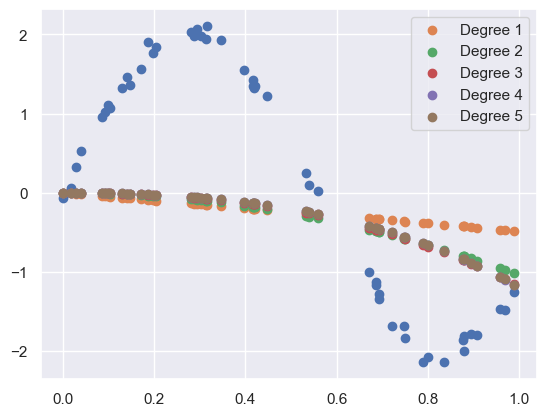

In [14]:
rng = np.random.RandomState(1)
x = rng.rand(50)
y = 2 * np.sin(1.8*np.pi*x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

# Change alpha to penalize more or less
alpha = 0.3

for i in range(1, 6):
    poly = PolynomialFeatures(i, include_bias=False) # with or without intercept
    x_poly = poly.fit_transform(x[:, None])

    poly_regr = LassoRegularization(alpha)
    poly_regr.fit(x_poly, y)
    y_pred = poly_regr.predict(x_poly)

    print(f"For degree {i}:")
    print(poly_regr.print_s(), '\n')
    plt.scatter(x, y_pred, label=f'Degree {i}')

plt.legend()
plt.show()

We observe that indeed, Lasso regularization implies 0 coefficients, whereas Ridge will only reduce the coefficients. L1 regularization punishes more features that have small impact, to keep only the most important ones, whereas L2 regularization is more shaded and less strict.

# Robust regression

Linear least-squares estimates can behave badly when the error distribution is not normal, particularly when
the errors are heavy-tailed. One remedy is to remove influential observations from the least-squares fit. Another approach, termed robust regression, is to employ a fitting criterion that is not as vulnerable as least squares to unusual data.

The most common general method of robust regression is M-estimation, introduced by Huber (1964).

Fill in the following class:

In [15]:
class RobustRegression:
    def __init__(self, potential, k):
        self.coef_ = None
        self.potential_ = potential
        self.k_ = k

    def mad(self, x):
        """Calculate the median absolute deviation (MAD)."""
        median = np.median(x) # median more robust than mean
        mad = np.median(np.abs(x - median))
        return mad

    def weight_function(self, x, potential, k):
        """Calculate the weight of a point residual x using the given potential function."""
        if potential == "huber":
            weight = np.where(
                np.abs(x) <= k,
                1,
                k / np.abs(x)
            )
        elif potential == "bisquare":
            weight = np.where(
                np.abs(x) <= k,
                (1 - (x / k) ** 2) ** 2,
                0
            )
        else:
            raise ValueError("Invalid potential function. Choose 'huber' or 'bisquare'.")
        return weight

    def fit(self, X, y):
        """Fit the data (X, y)."""
        # Augment X to include the intercept
        ones = np.ones((X.shape[0],), dtype=int)
        X_aug = np.column_stack((ones, X))

        # Initialize coefficients using ordinary least squares
        self.coef_ = np.linalg.lstsq(X_aug, y, rcond=None)[0]

        # Iteratively update coefficients using weighted least squares
        for _ in range(100):  
            residuals = y - X_aug @ self.coef_
            mad = self.mad(residuals)
            if mad == 0:  # Avoid division by zero
                break
            standardized_residuals = residuals / mad
            weights = self.weight_function(standardized_residuals, self.potential_, self.k_)
            W = np.diag(weights)
            self.coef_ = np.linalg.inv(X_aug.T @ W @ X_aug) @ X_aug.T @ W @ y

    def predict(self, X):
        """Make predictions for data X."""
        # Augment X to include the intercept
        ones = np.ones((X.shape[0],), dtype=int)
        X_aug = np.column_stack((ones, X))
        return X_aug @ self.coef_
    
    def print_s(self):
        """ Print the estimated model in a smoother way : ax1 + bx2 + ... + c
        Parameters:
        self
        Returns:
        res : string
        """

        res = 'The model is :'
        for ind, i in enumerate(self.coef_):
            if i >= 0 :
                res += f' + {round(i,2)}*x{ind}'

            else :
                res += f' - {abs(round(i,2))}*x{ind}'

        return res


Try it in the following data with outliers coming from the heavy-tail error and compare with the performance of the other models:

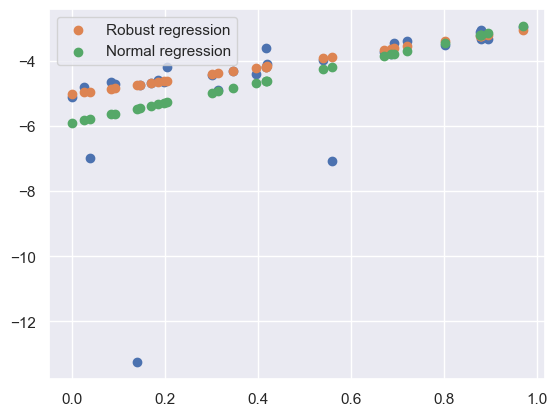

In [16]:
np.random.seed(300)
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* np.random.standard_cauchy(30)
plt.scatter(x, y)

# Robust regression with Huber potential
model = RobustRegression(potential="huber", k=1.5)
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y_pred, label='Robust regression')

# Normal regression
model = MultivariateLinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y_pred, label='Normal regression')

plt.legend()
plt.show()

We can clearly see that normal linear regression is biased because of the outliers, that drive the line toward the negative (where outliers are).

However, the robust regression is not biased by the outliers and the slope is smaller than for the normal one.

# Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In this section, we joinned the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.

As you may now, we should use time series techniques to analyze this dataset, instead, as a first simple approach, we will perform a multivariate linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

Let's start by loading the dataset:

In [17]:
import pandas as pd
daily = pd.read_csv('data.csv', index_col='Date', parse_dates=True)

In [18]:
daily.head(5)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1,0.010959


With this in place, we can choose the columns to use, and fit a linear regression model to our data:

In [19]:
# Drop any rows with null values
daily.dropna(inplace=True)

# We have all the days of the week as binary variables, so we can drop one of these columns to avoid redundancy
daily.drop(columns=['Mon'], inplace=True)

# Create our x and y variables
y = daily['Total']
X = daily.drop(columns=['Total'])

# Apply the previous algorithms to fit the number of bicycles
model = MultivariateLinearRegression()
model.fit(X, y)

# Save it in the daily dataframe in a 'predicted' column
daily['predicted'] = model.predict(X)

daily.head()

,Total,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,predicted
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1,0.000000,3463.400275
2012-10-04,3475.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.002740,3361.947831
2012-10-05,3148.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.005479,3160.933823
2012-10-06,2006.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.008219,1908.094174
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1,0.010959,1870.448616


Finally, we can compare the total and predicted bicycle traffic visually:

<Axes: xlabel='Date'>

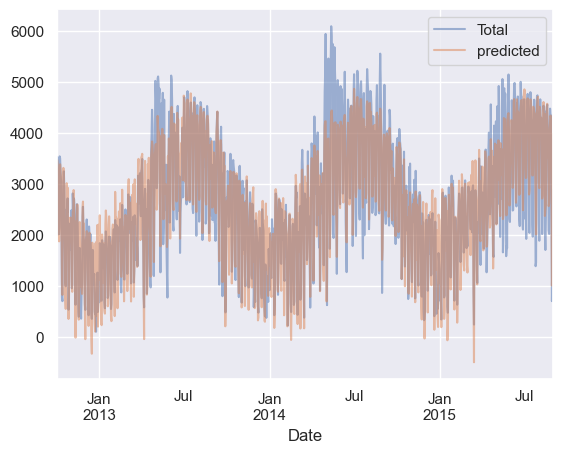

In [20]:
daily[['Total', 'predicted']].plot(alpha=0.5)

The model is : + 488.41*x0 + 118.25*x1 + 100.9*x2 - 9.76*x3 - 312.48*x4 - 1589.13*x5 - 1619.31*x6 - 1158.76*x7 + 129.02*x8 - 661.0*x9 + 65.21*x10 + 546.66*x11 + 27.04*x12


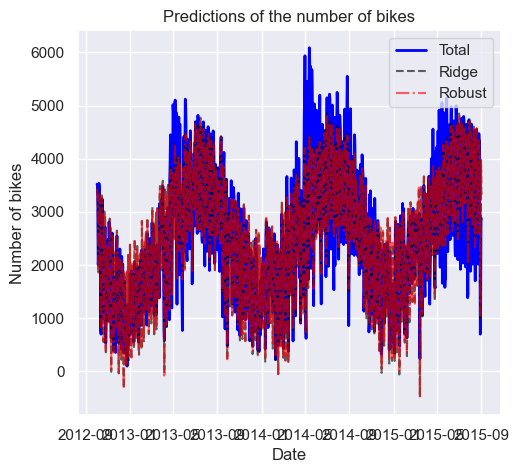

In [21]:
# Appliquer Ridge
model = RidgeRegularization(alpha=0.5)
model.fit(X, y)
daily['predicted_l2'] = model.predict(X)
print(model.print_s())

# Appliquer Robust Regression
model = RobustRegression(potential="huber", k=1.5)
model.fit(X, y)
daily['predicted_r'] = model.predict(X)

plt.figure(figsize=(12, 5))


# Plot the 3 models
plt.subplot(1, 2, 2)
plt.plot(daily.index, daily['Total'], label='Total', color='blue', linewidth=2)
plt.plot(daily.index, daily['predicted_l2'], label='Ridge', color='black', linestyle='dashed', alpha=0.6)
plt.plot(daily.index, daily['predicted_r'], label='Robust', color='red', linestyle='dashdot', alpha=0.6)

plt.title("Predictions of the number of bikes")
plt.xlabel("Date")
plt.ylabel("Number of bikes")
plt.legend()
plt.show()

It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Cross Validation
k = 5  # Divide 5 times
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Models
models = {
    "Basic": MultivariateLinearRegression(),
    "Ridge": RidgeRegularization(alpha=0.5),
    "Robust": RobustRegression(potential="huber", k=1.5)
}

results = {name: {"R2": [], "RMSE": []} for name in models.keys()}

# Loop in folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results[name]["R2"].append(r2)
        results[name]["RMSE"].append(rmse)

# Average of results over KFolds
for name in models.keys():
    print(f"{name} - Avg R2 : {np.mean(results[name]['R2']):.4f} | Avg RMSE : {np.mean(results[name]['RMSE']):.4f}")


Basic - Avg R2 : 0.8579 | Avg RMSE : 468.7559
Ridge - Avg R2 : 0.8582 | Avg RMSE : 468.3716
Robust - Avg R2 : 0.8531 | Avg RMSE : 475.4096
